In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

UsageError: Line magic function `%` not found.


In [ ]:
df = pd.read_csv('tmdb-movies.csv')

In [8]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [10]:
print('The data contain (rows,columns) :',df.shape)

The data contain (rows,columns) : (10866, 21)


In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.runtime.mean()

102.07086324314375

In [13]:
df.budget.mean()

14625701.09414688

In [14]:
df.revenue.mean()

39823319.79339223

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
print ('The data contain' ,df.duplicated().sum() ,'duplicated row(s)')

The data contain 1 duplicated row(s)


In [17]:
df.isnull().sum(axis=0)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df['release_date']=pd.to_datetime(df['release_date'])
df['months']=df['release_date'].dt.month_name()

In [20]:
df.fillna(0,inplace=True)
print()

In [21]:
df.drop([ 'imdb_id','homepage', 'tagline','overview'] , axis = 1 , inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10865 non-null  object        
 6   director              10865 non-null  object        
 7   keywords              10865 non-null  object        
 8   runtime               10865 non-null  int64         
 9   genres                10865 non-null  object        
 10  production_companies  10865 non-null  object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

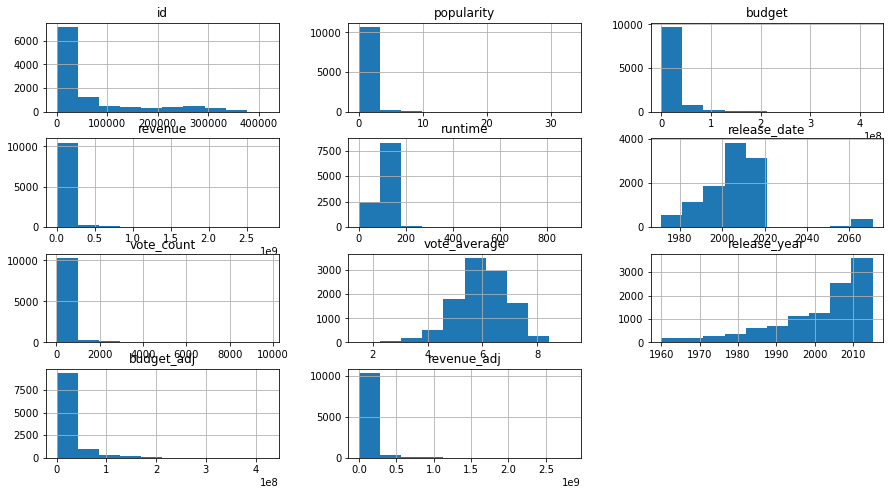

In [23]:
df.hist(figsize=(15,8))
print()

year 2014 has the highest release of movies 700


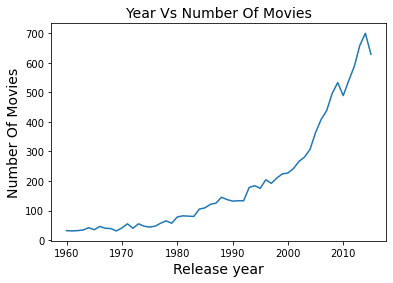

In [24]:
#create series (values=number of movies ,index=years)
years= list(df['release_year'].values)
s=(pd.value_counts(years)).sort_index()
#plot the figure and setup the title and labels
plt.plot(s)
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)
print ('year',s[s==s.max()].index[0],'has the highest release of movies',s.max())

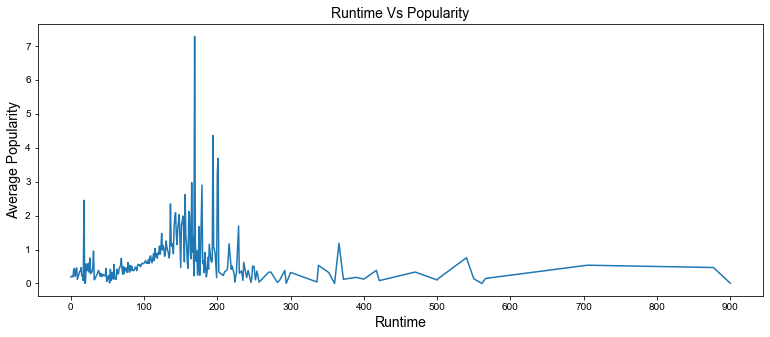

In [25]:
#make group with runtime & popularity
group=df.groupby('runtime')['popularity'].mean()
#plot the figure and setup the title and labels
group.plot(figsize = (13,5),xticks=np.arange(0,1000,100))
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 14)
plt.ylabel('Average Popularity',fontsize = 14)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


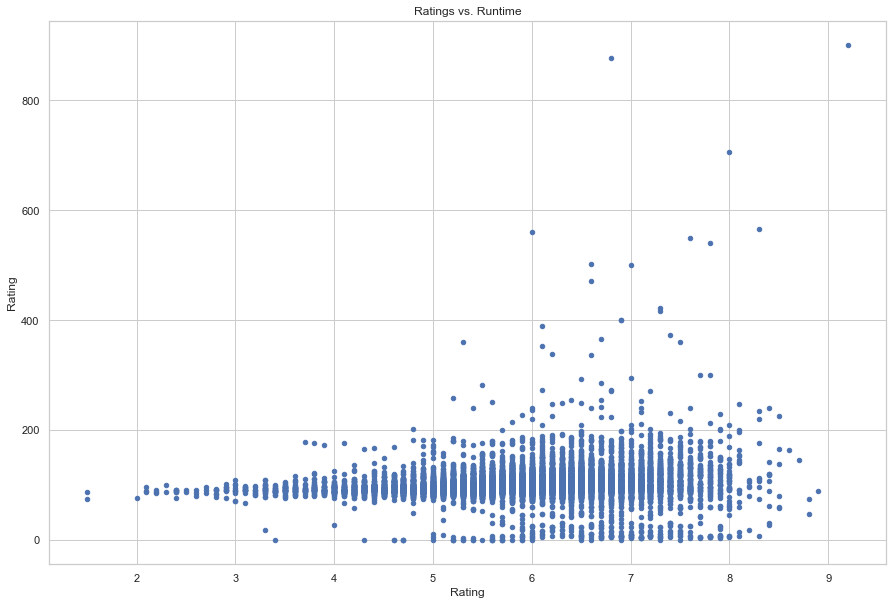

In [34]:
# Plot scatter plot of these two columns
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Rating');

Movie Which Has Highest Profit : Avatar
Movie Which Has Lowest Profit : The Warrior's Way


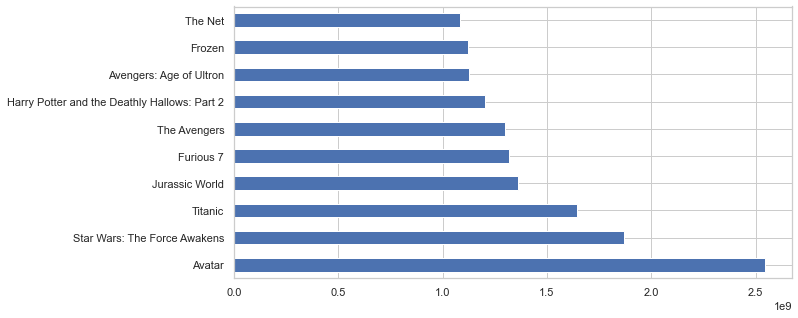

In [27]:
#create new column for profit
df['profit']=df['revenue']-df['budget']
#extract the top 10 profit
t= df.nlargest(10, 'profit')
#create series (value=profit ,index=original_title)
tob_10 = pd.Series(t.profit.values,t.original_title.values)
#plot the figure and setup the title and labels
tob_10.plot(kind='barh')
#ectract Movie Which Has Highest Profit
highest_Profit=df[df['profit']==df.profit.max()].original_title.values[0]
#extract Movie Which Has Lowest Profit
lowest_Profit=df[df['profit']==df.profit.min()].original_title.values[0]
print('Movie Which Has Highest Profit :',highest_Profit)
print('Movie Which Has Lowest Profit :',lowest_Profit)

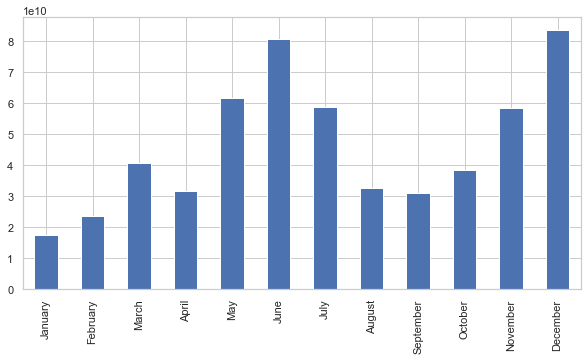

In [29]:
#create series(index = months ,values = revenue_adj for every month)
month_revenue=df.groupby(['months']).sum().revenue_adj
#order month
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August","September", "October", "November", "December"]
month_revenue.index = pd.Categorical(month_revenue.index, categories = sort_order, ordered =
True)
month_revenue=month_revenue.sort_index()
#plot the figure and setup the title and labels
month_revenue.plot(kind='bar')
print()

Drama has the highest release of movies 4760


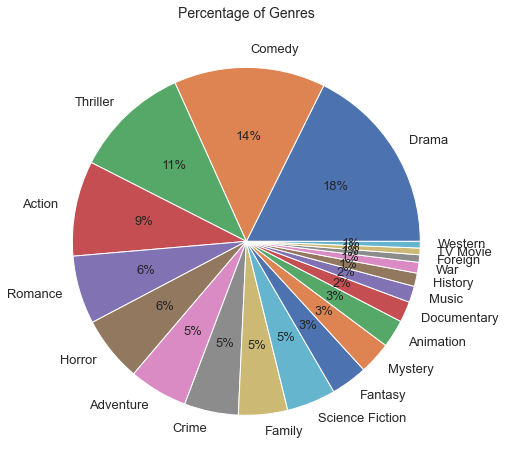

In [30]:
#drop nan value in genres
d_f=df.copy()
d_f['genres'] = d_f['genres'].replace(0, np.nan)
d_f=d_f.dropna()
#extract different type of movies
genre= list(d_f['genres'].values)
genre="|".join(str(v)for v in genre)
genre=genre.split('|')
m=pd.value_counts(genre)
#plot the figure and setup the title and labels
m.plot(kind='pie',figsize=(8,8), fontsize=13, autopct='%1.0f%%')
plt.title('Percentage of Genres',fontsize = 14)
plt.ylabel('');
print (m[m==m.max()].index[0],'has the highest release of movies',m.max())

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487,-0.074975
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085,0.628997
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531,0.570222
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109,0.976162
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668,0.136022
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941,0.755908
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062,0.183067
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236,0.032038
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627,0.545654
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000,0.914145


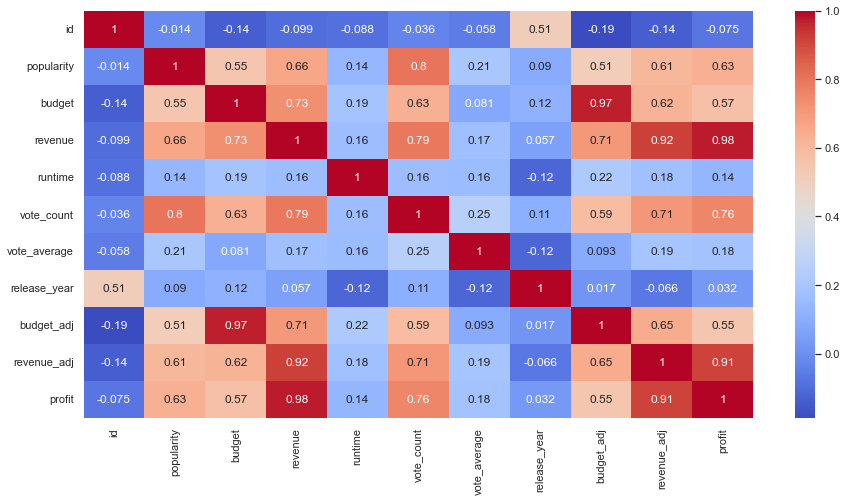

In [31]:
plt.figure(figsize=(15,7.5))
c=df.corr()
sns.heatmap(c,cmap='coolwarm',annot=True)
c